# Predict Clicked Ads Customer Classification by using Machine Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Clicked Ads Dataset.csv", index_col=0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df_clean = df.dropna()
df_clean["Clicked on Ad"] = df_clean["Clicked on Ad"].map({"Yes": 1, "No": 0})

In [5]:
df_clean.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,963.000000,963.000000,9.630000e+02,963.000000,963.000000
mean,64.829200,36.049844,3.855628e+08,179.716106,0.503634
std,15.892075,8.764154,9.380390e+07,43.867289,0.500247
min,32.600000,19.000000,9.797550e+07,104.780000,0.000000
25%,50.600000,29.000000,3.296658e+08,138.615000,0.000000
50%,68.010000,35.000000,3.991039e+08,182.200000,1.000000
75%,78.365000,42.000000,4.591870e+08,218.550000,1.000000
max,91.430000,61.000000,5.563936e+08,267.010000,1.000000


In [6]:
df_clean.describe(include=["object"])

,Male,Timestamp,city,province,category
count,963,963,963,963,963
unique,2,960,30,16,10
top,Perempuan,5/20/2016 12:17,Bandung,Daerah Khusus Ibukota Jakarta,Otomotif
freq,502,2,64,244,108


## Task 1

### Univariate Analysis

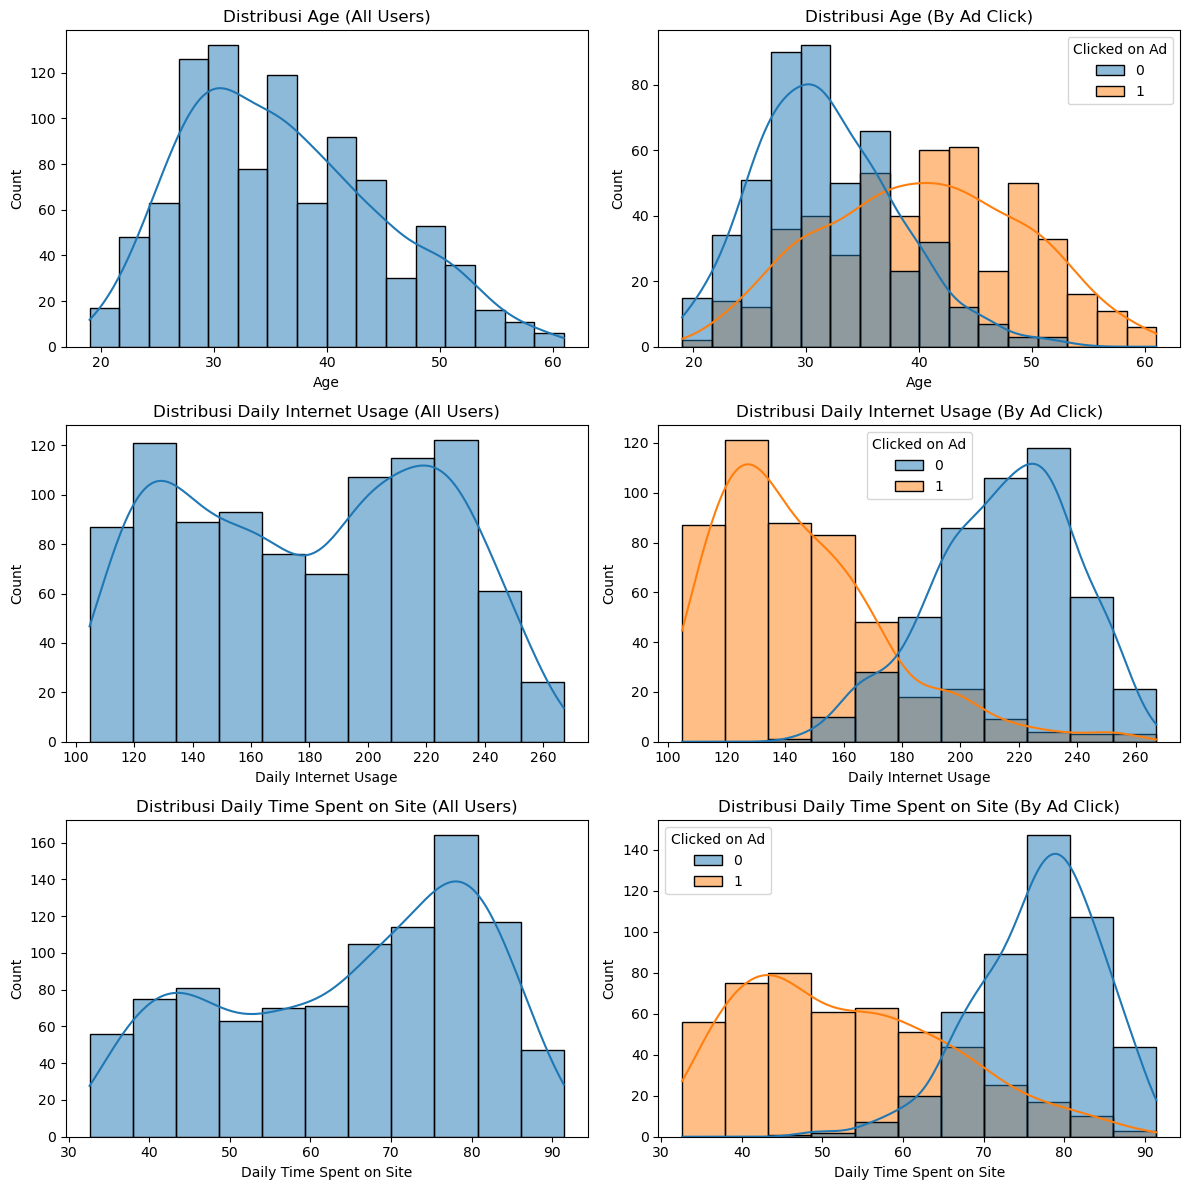

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
cols = ["Age", "Daily Internet Usage", "Daily Time Spent on Site"]

for i, col in enumerate(cols):
    sns.histplot(df_clean[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribusi {col} (All Users)")

    sns.histplot(data=df_clean, x=col, hue="Clicked on Ad", kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribusi {col} (By Ad Click)")

plt.tight_layout()
plt.show()

### Bivariate Analysis

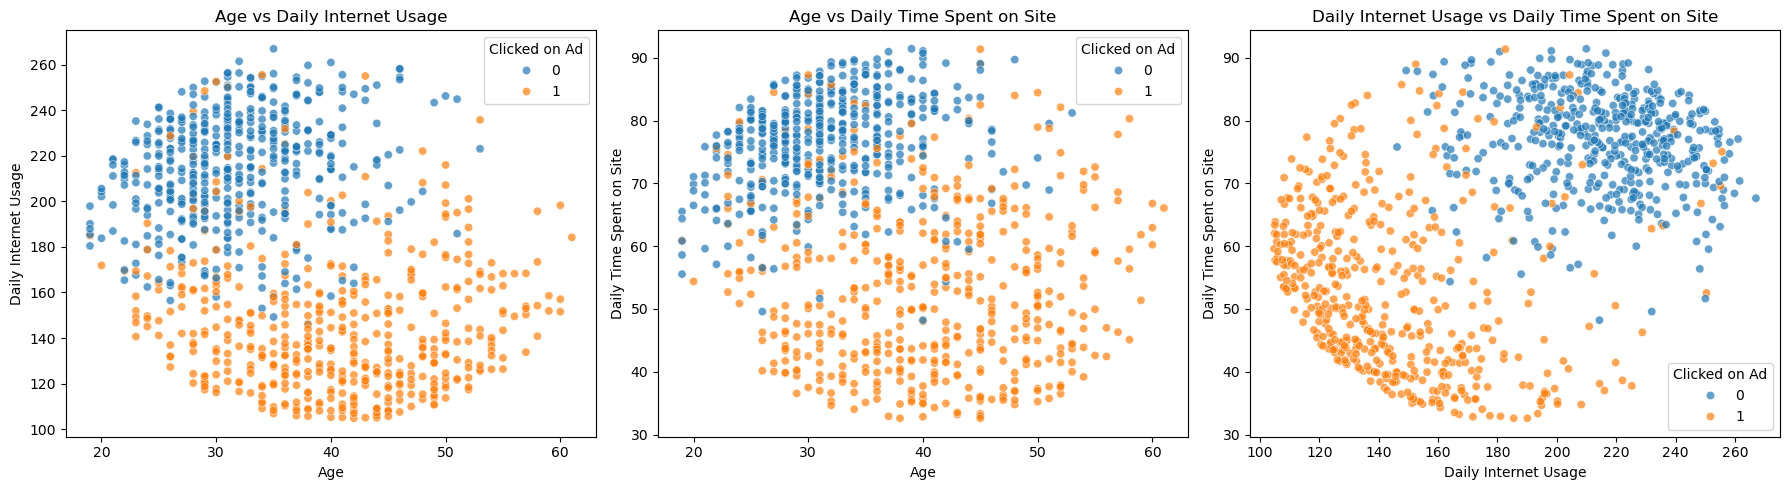

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=df_clean, x="Age", y="Daily Internet Usage", hue="Clicked on Ad", ax=axes[0], alpha=0.7
)
axes[0].set_title("Age vs Daily Internet Usage")

sns.scatterplot(
    data=df_clean, x="Age", y="Daily Time Spent on Site", hue="Clicked on Ad", ax=axes[1], alpha=0.7
)
axes[1].set_title("Age vs Daily Time Spent on Site")

sns.scatterplot(
    data=df_clean, x="Daily Internet Usage", y="Daily Time Spent on Site",
    hue="Clicked on Ad", ax=axes[2], alpha=0.7
)
axes[2].set_title("Daily Internet Usage vs Daily Time Spent on Site")

plt.tight_layout()
plt.show()

### Multivariate Analysis

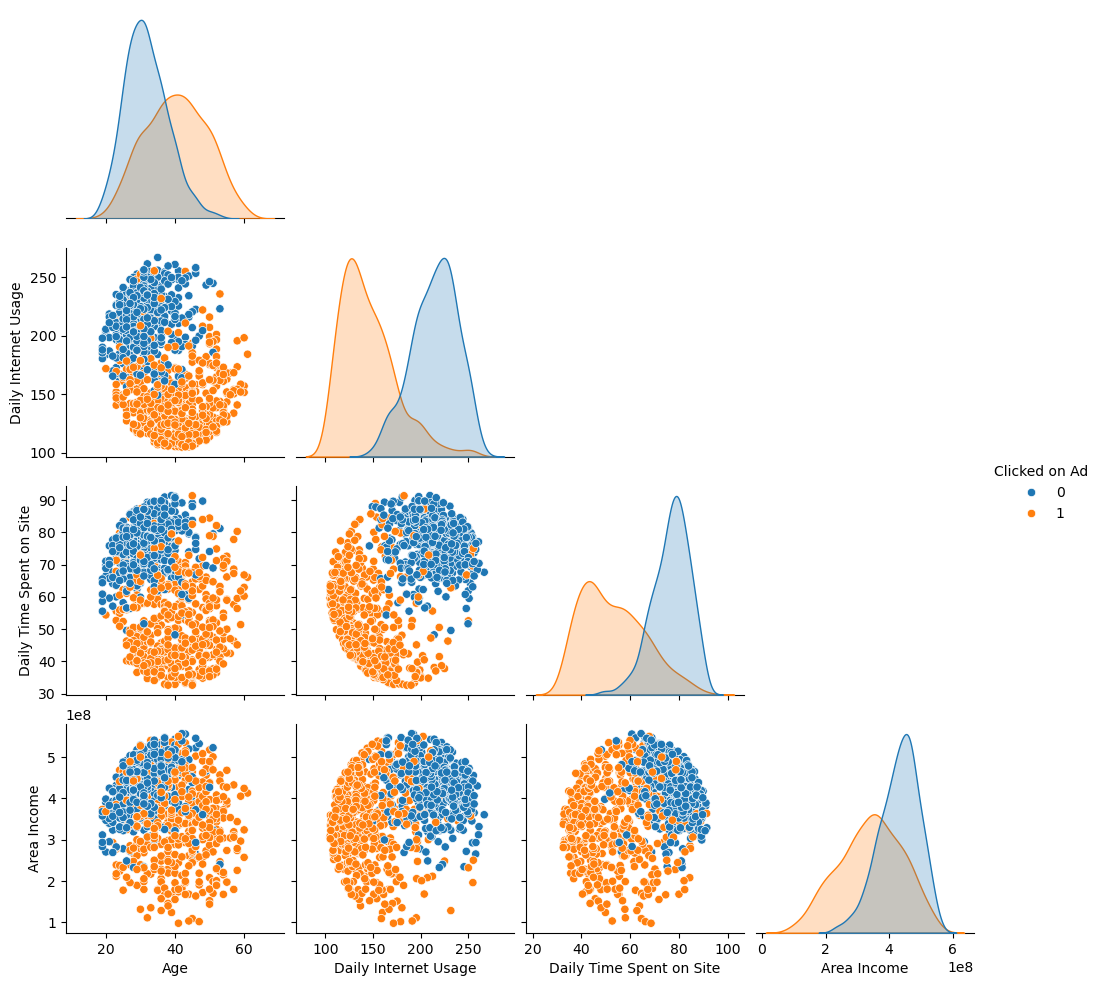

In [9]:
sns.pairplot(
    df_clean[["Age", "Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Clicked on Ad"]],
    hue="Clicked on Ad",
    diag_kind="kde",
    corner=True
)
plt.show()

### Heatmap

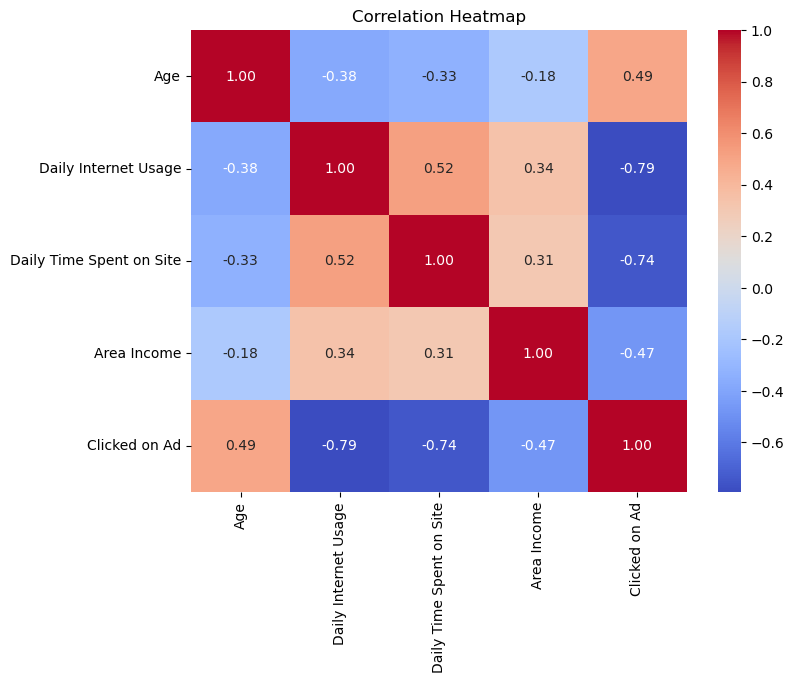

In [10]:
plt.figure(figsize=(8, 6))
corr = df_clean[["Age", "Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Clicked on Ad"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Task 2

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [12]:
print("Missing values before handling:\n", df.isnull().sum().sort_values(ascending=False))

Missing values before handling:
 Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64


In [13]:
df_clean = df.copy()
df_clean = df_clean.dropna()
df_clean = df_clean.drop_duplicates()
df_clean = df_clean.rename(columns={"Male": "Gender"})
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  963 non-null    float64
 1   Age                       963 non-null    int64  
 2   Area Income               963 non-null    float64
 3   Daily Internet Usage      963 non-null    float64
 4   Gender                    963 non-null    object 
 5   Timestamp                 963 non-null    object 
 6   Clicked on Ad             963 non-null    object 
 7   city                      963 non-null    object 
 8   province                  963 non-null    object 
 9   category                  963 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 82.8+ KB


In [14]:
df_clean["Clicked on Ad"] = df_clean["Clicked on Ad"].map({"Yes": 1, "No": 0})
df_clean = pd.get_dummies(df_clean, columns=["Gender", "city", "province", "category"], drop_first=True)

In [15]:
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"], errors="coerce")
df_clean["Year"] = df_clean["Timestamp"].dt.year
df_clean["Month"] = df_clean["Timestamp"].dt.month
df_clean["Week"] = df_clean["Timestamp"].dt.isocalendar().week
df_clean["Day"] = df_clean["Timestamp"].dt.day
df_clean["DayOfWeek"] = df_clean["Timestamp"].dt.dayofweek

In [16]:
X = df_clean.drop(columns=["Clicked on Ad", "Timestamp"])
y = df_clean["Clicked on Ad"]

## Task 3

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print("X_train and X_test size:", X_train.shape, X_test.shape)
print("y_train and y_test size:", y_train.shape, y_test.shape)

X_train and X_test size: (674, 63) (289, 63)
y_train and y_test size: (674,) (289,)


### W/ Normalization

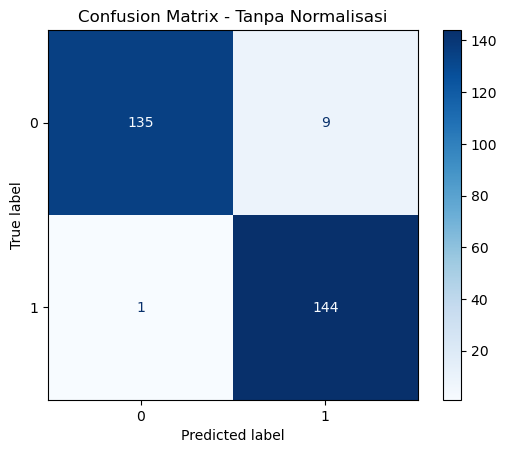

Classification Report - Tanpa Normalisasi
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       144
           1       0.94      0.99      0.97       145

    accuracy                           0.97       289
   macro avg       0.97      0.97      0.97       289
weighted avg       0.97      0.97      0.97       289



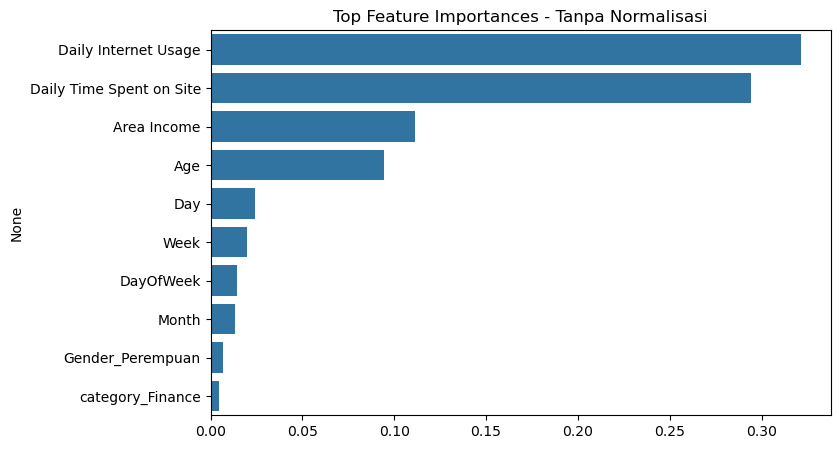

In [18]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)

y_pred1 = rf1.predict(X_test)

# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=rf1.classes_)
disp1.plot(cmap="Blues")
plt.title("Confusion Matrix - Tanpa Normalisasi")
plt.show()

print("Classification Report - Tanpa Normalisasi")
print(classification_report(y_test, y_pred1))

# Feature Importance
feat_importances1 = pd.Series(rf1.feature_importances_, index=X.columns)
top_features1 = feat_importances1.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features1.values, y=top_features1.index)
plt.title("Top Feature Importances - Tanpa Normalisasi")
plt.show()

### W/O Normalization

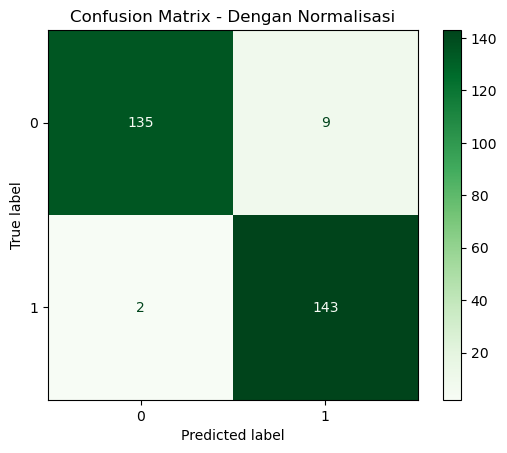

Classification Report - Dengan Normalisasi
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       144
           1       0.94      0.99      0.96       145

    accuracy                           0.96       289
   macro avg       0.96      0.96      0.96       289
weighted avg       0.96      0.96      0.96       289



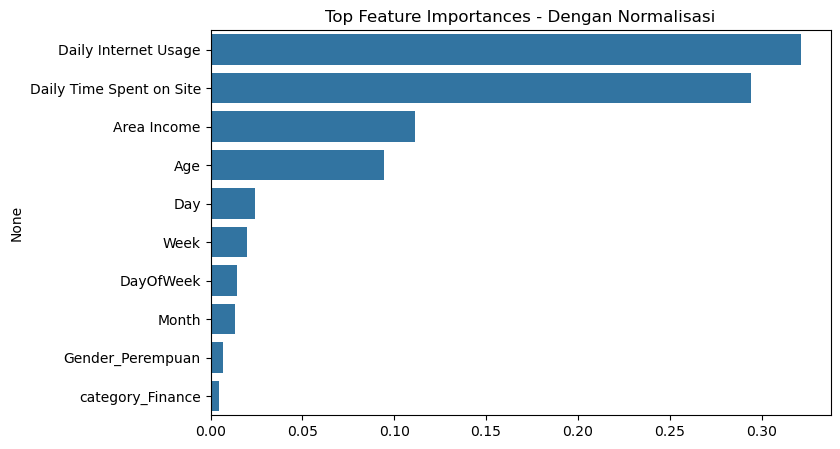

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train_scaled, y_train)

y_pred2 = rf2.predict(X_test_scaled)

# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf2.classes_)
disp2.plot(cmap="Greens")
plt.title("Confusion Matrix - Dengan Normalisasi")
plt.show()

print("Classification Report - Dengan Normalisasi")
print(classification_report(y_test, y_pred2))

feat_importances2 = pd.Series(rf2.feature_importances_, index=X.columns)
top_features2 = feat_importances2.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features2.values, y=top_features2.index)
plt.title("Top Feature Importances - Dengan Normalisasi")
plt.show()

## Task 4

### Simulasi non ML

In [ ]:
# Asumsi simulasi
baseline_conv_rate = df_clean["Clicked on Ad"].mean()
total_users = 1000
marketing_cost_per_user = 1000
revenue_per_conversion = 20000
ml_precision_raw = 0.94

def simulate(name, conv_rate, total_users, cost_per_user, revenue_per_conversion):
    cost = total_users * cost_per_user
    conversions = total_users * conv_rate
    revenue = conversions * revenue_per_conversion
    profit = revenue - cost
    roi = (profit / cost) if cost != 0 else None
    return {
        "scenario": name,
        "total_users_targeted": total_users,
        "conversion_rate": conv_rate,
        "expected_conversions": conversions,
        "total_cost": cost,
        "total_revenue": revenue,
        "total_profit": profit,
        "roi": roi
    }

In [29]:
sim_no_ml = simulate(
    name="No ML (baseline - target all users randomly)",
    conv_rate=baseline_conv_rate,
    total_users=total_users,
    cost_per_user=marketing_cost_per_user,
    revenue_per_conversion=revenue_per_conversion
)

sim_ml_raw = simulate(
    name="With ML (use model precision as conversion rate)",
    conv_rate=ml_precision_raw,
    total_users=total_users,
    cost_per_user=marketing_cost_per_user,
    revenue_per_conversion=revenue_per_conversion
)

In [30]:
summary = pd.DataFrame([sim_no_ml, sim_ml_raw])
# Format numeric columns for readability
num_cols = ["conversion_rate", "expected_conversions", "total_cost", "total_revenue", "total_profit", "roi"]
summary[num_cols] = summary[num_cols].apply(pd.to_numeric)
summary["total_cost"] = summary["total_cost"].map("Rp {:,.0f}".format)
summary["total_revenue"] = summary["total_revenue"].map("Rp {:,.0f}".format)
summary["total_profit"] = summary["total_profit"].map("Rp {:,.0f}".format)
summary["expected_conversions"] = summary["expected_conversions"].map("{:,.1f}".format)
summary["roi"] = summary["roi"].map(lambda x: f"{x:.2f}" if pd.notnull(x) else "N/A")

summary[[
    "scenario", "total_users_targeted", "conversion_rate",
    "expected_conversions", "total_cost", "total_revenue", "total_profit", "roi"
]]

,scenario,total_users_targeted,conversion_rate,expected_conversions,total_cost,total_revenue,total_profit,roi
0,No ML (baseline - target all users randomly),1000,0.503634,503.6,"Rp 1,000,000","Rp 10,072,690","Rp 9,072,690",9.07
1,With ML (use model precision as conversion rate),1000,0.940000,940.0,"Rp 1,000,000","Rp 18,800,000","Rp 17,800,000",17.80
